In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

breast_cancer = load_breast_cancer()

df_features = breast_cancer.feature_names

In [2]:
df_features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [3]:
df_data = pd.DataFrame(breast_cancer.data, columns = df_features)

df_labels = pd.DataFrame(breast_cancer.target, columns = ['label'])

data = pd.concat([df_data, df_labels], axis = 1)

data

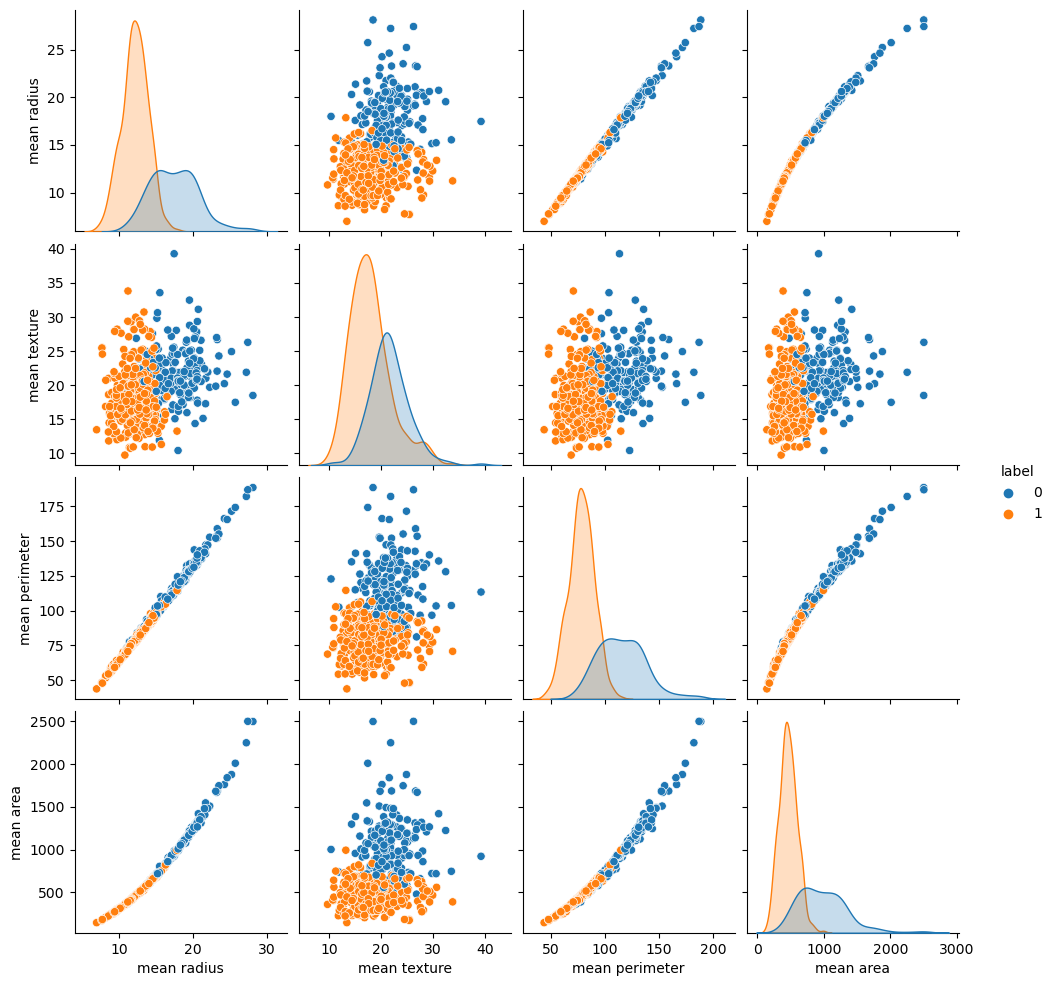

In [5]:
import seaborn as sns

sns.pairplot(data,
             vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area'],
            hue ='label')
plt.show()

In [12]:
#Splitting the data into training and test test
X = data.iloc[:,0:30].values
y = data.iloc[:,30].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [13]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [14]:
Y

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [0, 1]], dtype=uint8)

In [16]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(64,input_shape=(30,),activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                1984      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_8 (Dense)             (None, 2)                

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model_history=model.fit(x = X_train, y = y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

Epoch 1/100
15/15 [==============================] - 0s 9ms/step - loss: 0.8629 - accuracy: 0.5692 - val_loss: 0.5065 - val_accuracy: 0.7281
Epoch 2/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.6571 - val_loss: 0.4194 - val_accuracy: 0.8596
Epoch 3/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6064 - accuracy: 0.7253 - val_loss: 0.3698 - val_accuracy: 0.9035
Epoch 4/100
15/15 [==============================] - 0s 3ms/step - loss: 0.5194 - accuracy: 0.7604 - val_loss: 0.3222 - val_accuracy: 0.9211
Epoch 5/100
15/15 [==============================] - 0s 2ms/step - loss: 0.5388 - accuracy: 0.7275 - val_loss: 0.2906 - val_accuracy: 0.9386
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4226 - accuracy: 0.7912 - val_loss: 0.2641 - val_accuracy: 0.9386
Epoch 7/100
15/15 [==============================] - 0s 3ms/step - loss: 0.3807 - accuracy: 0.8110 - val_loss: 0.2323 - val_accuracy: 0.9561
Epoch 8/100
1

Epoch 59/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0874 - accuracy: 0.9670 - val_loss: 0.0955 - val_accuracy: 0.9825
Epoch 60/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0809 - accuracy: 0.9780 - val_loss: 0.0966 - val_accuracy: 0.9825
Epoch 61/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0932 - accuracy: 0.9692 - val_loss: 0.1008 - val_accuracy: 0.9825
Epoch 62/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0939 - accuracy: 0.9714 - val_loss: 0.1049 - val_accuracy: 0.9825
Epoch 63/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0826 - accuracy: 0.9692 - val_loss: 0.1051 - val_accuracy: 0.9825
Epoch 64/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0767 - accuracy: 0.9758 - val_loss: 0.1051 - val_accuracy: 0.9825
Epoch 65/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0766 - accuracy: 0.9780 - val_loss: 0.1047 - val_accuracy: 0.9825
Epoch 

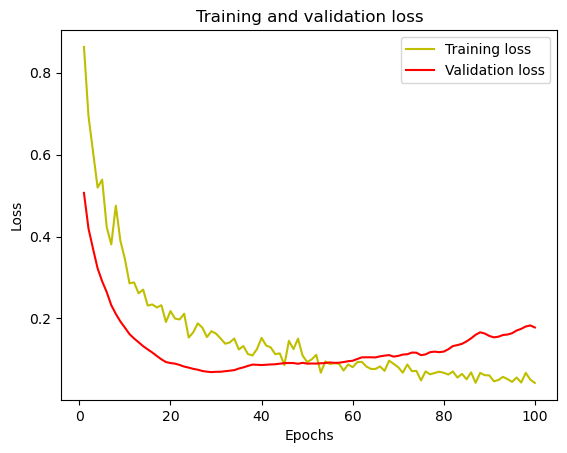

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

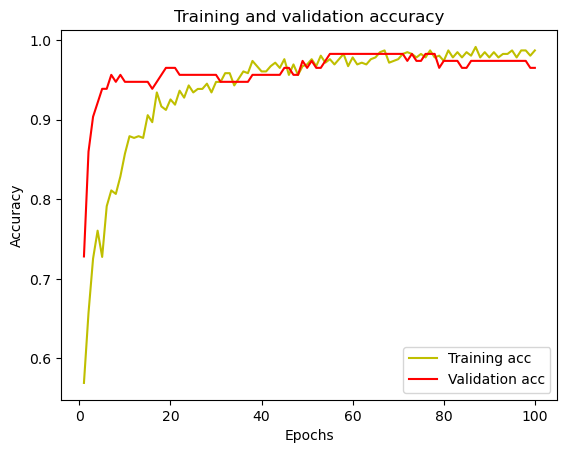

In [20]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [21]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        47
           1       0.97      0.97      0.97        67

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

[[45  2]
 [ 2 65]]
